## Random Forest Classification

Random forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

In [3]:
SMdata = pd.read_csv('SMData.csv')
SMdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13198 entries, 0 to 13197
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Unnamed: 0                                                13198 non-null  int64  
 1    Debt ratio %                                             13198 non-null  float64
 2    Borrowing dependency                                     13198 non-null  float64
 3    Liability to Equity                                      13198 non-null  float64
 4    Net Income to Stockholder's Equity                       13198 non-null  float64
 5    Persistent EPS in the Last Four Seasons                  13198 non-null  float64
 6    ROA(C) before interest and depreciation before interest  13198 non-null  float64
 7    Net worth/Assets                                         13198 non-null  float64
 8    ROA(B) before i

In [4]:
x = SMdata.drop(columns = ["Bankrupt?"])
y = pd.DataFrame(SMdata["Bankrupt?"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

In [5]:
RFclf = RandomForestClassifier(n_estimators = 100)  
RFclf.fit(x_train, y_train.values.ravel())

y_pred = RFclf.predict(x_test)

Random Forest Classifier Confusion Matrix
Classification Accuracy:  0.9853535353535353
TPR:  0.9780724120346762
FPR:  0.007503751875937969


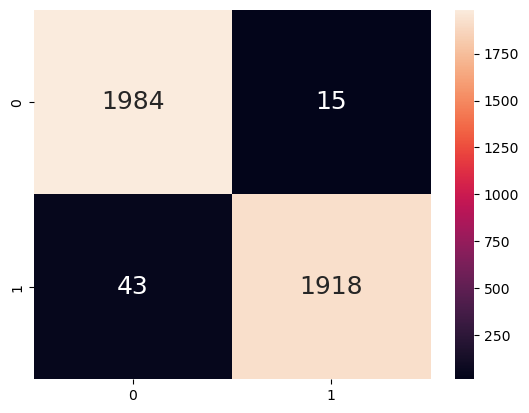

In [6]:
print("Random Forest Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18})

print("Classification Accuracy: ", RFclf.score(x_test, y_test))
print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))

In [8]:
print('Random Forest TEST F1 Score: {}'.format(f1_score(y_test,y_pred)))

Random Forest TEST F1 Score: 0.9851052901900359
